In [2]:
# import all necessary library
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [3]:
print('Hello World')

Hello World


In [4]:
df = pd.read_csv('data/Codr Data1.csv')

In [5]:
df.head(10)

,id,Date,FirstTimeDownloads,Installations,Impressions
0,1,8/17/2022,0,0,28
1,2,8/18/2022,0,0,54
2,3,8/19/2022,2,0,44
3,4,8/20/2022,1,1,32
4,5,8/21/2022,1,2,30
5,6,8/22/2022,3,0,45
6,7,8/23/2022,3,2,69
7,8,8/24/2022,1,0,36
8,9,8/25/2022,1,0,39
9,10,8/26/2022,1,0,38


In [6]:
df.drop(['id'], axis=1, inplace=True)

In [7]:
df['Datetime'] = df['Date'].copy()
df['Datetime'] = pd.to_datetime(df['Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                90 non-null     object        
 1   FirstTimeDownloads  90 non-null     int64         
 2   Installations       90 non-null     int64         
 3   Impressions         90 non-null     int64         
 4   Datetime            90 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 3.6+ KB


## EDA

In [9]:
df['Day'] = df['Datetime'].dt.strftime('%d')
df['Month'] = df['Datetime'].dt.strftime('%m')
df['Year'] = df['Datetime'].dt.strftime('%Y')

In [10]:
print("Start", df['Month'].min())
print("End", df['Month'].max())

Start 08
End 11


In [11]:
summary_data = df.groupby(['Month'])['FirstTimeDownloads', 'Installations', 'Impressions'].sum()
summary_data

,FirstTimeDownloads,Installations,Impressions
Month,,,
08,16,9,608
09,58,17,1539
10,57,28,1728
11,30,11,793


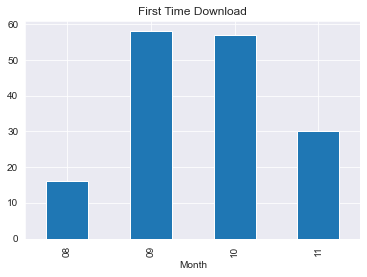

In [12]:
summary_data['FirstTimeDownloads'].plot(kind = 'bar')
plt.title('First Time Download');

Text(0.5, 1.0, 'Installations')

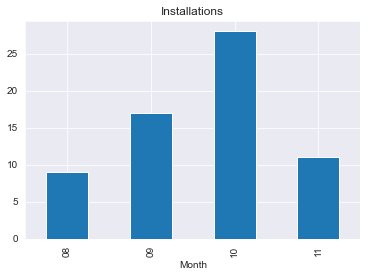

In [13]:
summary_data['Installations'].plot(kind = 'bar')
plt.title('Installations')

Text(0.5, 1.0, 'Installations')

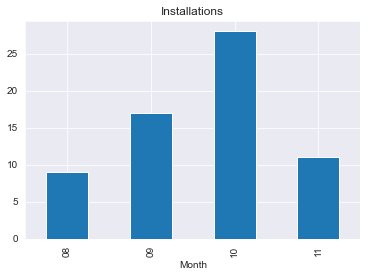

In [14]:
summary_data['Installations'].plot(kind = 'bar')
plt.title('Installations')

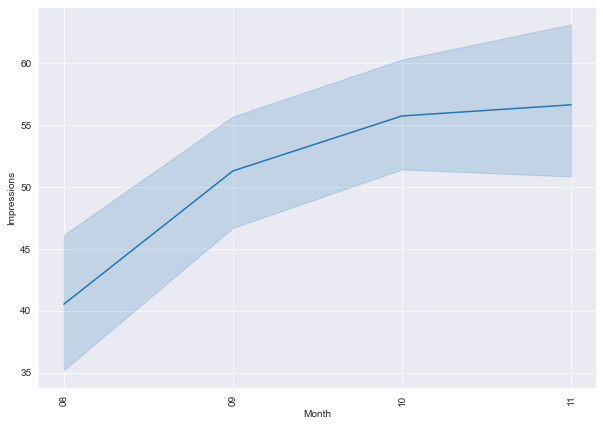

In [15]:
plt.figure(figsize=(10,7))
sns.lineplot(data = df, x = 'Month', y = 'Impressions')
plt.xticks(rotation=90)
plt.show()

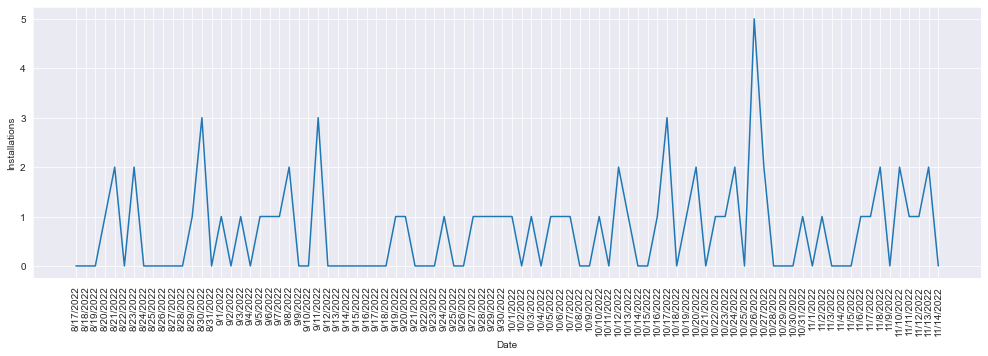

In [16]:
plt.figure(figsize=(17,5))
sns.lineplot(data = df, x = 'Date', y = 'Installations')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Impressions', ylabel='Date'>

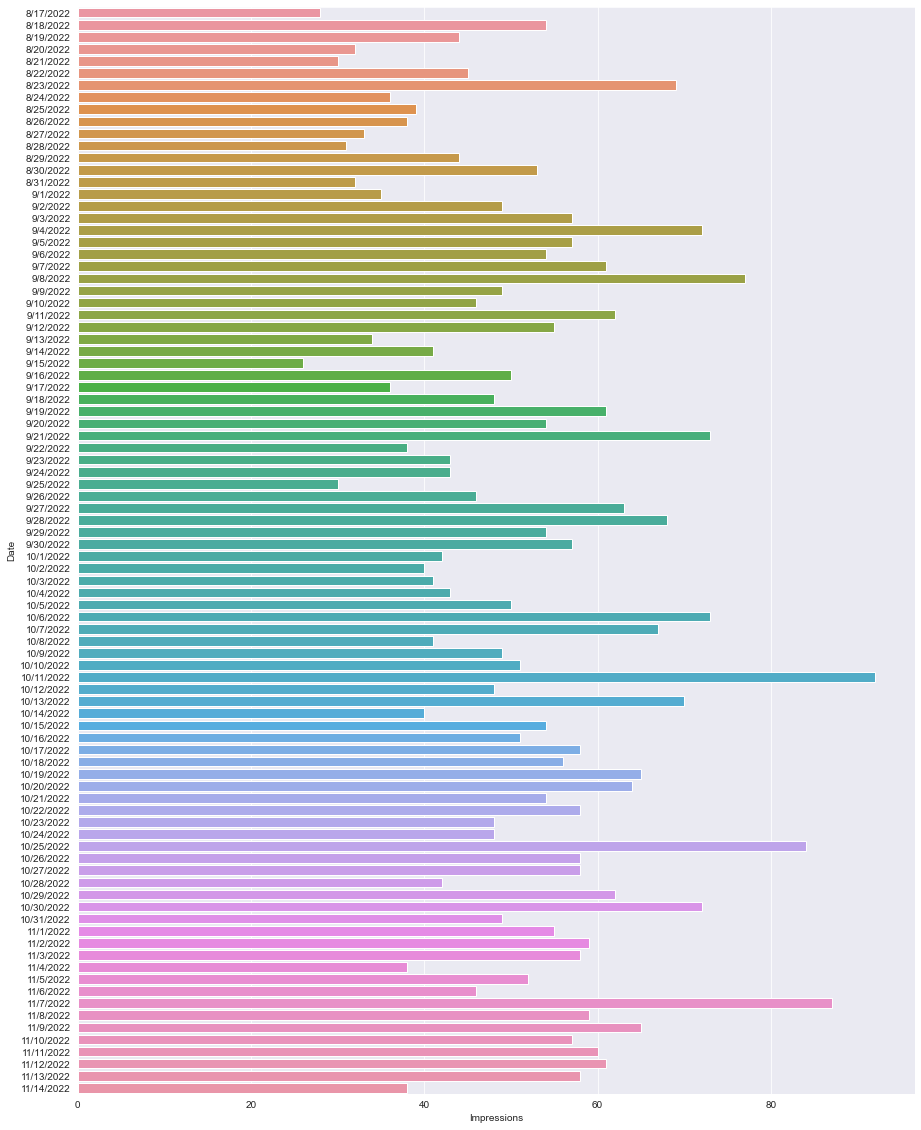

In [17]:
plt.figure(figsize=(15,20))
sns.barplot(data = df, x = 'Impressions', y = 'Date')

In [18]:
df.groupby(df['Datetime'].dt.day_name())['FirstTimeDownloads'].mean()

Datetime
Friday       1.307692
Monday       1.923077
Saturday     2.153846
Sunday       1.461538
Thursday     1.769231
Tuesday      2.083333
Wednesday    1.846154
Name: FirstTimeDownloads, dtype: float64

In [19]:
df.groupby(df['Datetime'].dt.day_name())['Installations'].mean()

Datetime
Friday       0.230769
Monday       0.923077
Saturday     0.461538
Sunday       0.769231
Thursday     0.923077
Tuesday      0.833333
Wednesday    0.923077
Name: Installations, dtype: float64

In [20]:
df.groupby(df['Datetime'].dt.day_name())['Impressions'].mean()

Datetime
Friday       48.538462
Monday       52.307692
Saturday     47.461538
Sunday       49.000000
Thursday     54.076923
Tuesday      59.666667
Wednesday    52.615385
Name: Impressions, dtype: float64

## TEST TRAIN

In [34]:
from sklearn.model_selection import train_test_split
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [35]:
df1 = df.copy()

In [36]:
df1 = df1.drop(columns=['FirstTimeDownloads','Installations','Day','Month','Year','Datetime'])

In [37]:
df1.columns = ['ds','y']
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      90 non-null     object
 1   y       90 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


In [38]:
df1['y'] = df1['y'].astype("int64")

In [71]:
#only use 20% as test data
train, test = df1[:-17], df1[-17:]

In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      73 non-null     object
 1   y       73 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


In [73]:
train.sample(10)

,ds,y
56,10/12/2022,48
34,9/20/2022,54
14,8/31/2022,32
64,10/20/2022,64
47,10/3/2022,41
3,8/20/2022,32
41,9/27/2022,63
62,10/18/2022,56
52,10/8/2022,41
63,10/19/2022,65


In [74]:
X_train = pd.DataFrame(train['ds'])
y_train = pd.DataFrame(train['y'])
X_test = pd.DataFrame(test['ds'])
y_test = pd.DataFrame(test['y'])

In [75]:
model = Prophet()
model.fit(train)

13:58:25 - cmdstanpy - INFO - Chain [1] start processing
13:58:25 - cmdstanpy - INFO - Chain [1] done processing


In [76]:
y_pred = model.predict(X_test)
y_pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-10-29,58.905469,36.623363,67.949703,58.905469,58.905469,-6.018364,-6.018364,-6.018364,-6.018364,-6.018364,-6.018364,0.0,0.0,0.0,52.887104
1,2022-10-30,59.131221,39.947421,70.881320,59.131221,59.131221,-4.344905,-4.344905,-4.344905,-4.344905,-4.344905,-4.344905,0.0,0.0,0.0,54.786316
2,2022-10-31,59.356974,44.849631,74.062227,59.356974,59.356974,-0.072572,-0.072572,-0.072572,-0.072572,-0.072572,-0.072572,0.0,0.0,0.0,59.284402
3,2022-11-01,59.582727,53.374775,83.613456,59.582727,59.582727,9.297577,9.297577,9.297577,9.297577,9.297577,9.297577,0.0,0.0,0.0,68.880303
4,2022-11-02,59.808479,45.017135,74.985019,59.808479,59.808479,0.574848,0.574848,0.574848,0.574848,0.574848,0.574848,0.0,0.0,0.0,60.383328


In [77]:
yhat = y_pred['yhat'].values

In [78]:
MAPE = mean_absolute_percentage_error(y_test, yhat)
MAPE

0.1859202726418398